In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definitions ###
$F$ = fraction of melt in the system (from 1 for entirely liquid to 0 for entirely crystalline)

$D_i$ = distribution coefficient for element i (concentration in mineral)/(concentration in melt)

$C_L$ = concentration of an element in the liquid

$C_S$ = concentration of an element in the solid

$C_0$ = concentration of an element in the total system (e.g., is original concentration in the solid if we consider partial melting of a rock, or is original concentration in the liquid if we consider crystallization of a magma)

### Batch Melting Equation ###
$C_L/C_0 = 1/(F+D-FD)$

In [2]:
# Function for the batch melting equation
def batch_melt(F,D):
    CL_C0 = 1/(F+D-F*D)
    return (CL_C0)

Solve this equation for:
* F ranging from 0 to 1 in steps of 0.05
* D values of 0.05, 0.06, 0.1, 0.5, 1, 2 and 10


In [3]:
F = np.arange(0,1.01,0.05)
D = np.array([0.05,0.06,0.1,0.5,1,2,10])
print('F Values: ',F)
print('D Values: ',D)

F Values:  [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
D Values:  [ 0.05  0.06  0.1   0.5   1.    2.   10.  ]


Make two graphs, both plotting $C_L/C_0$ versus $F$. Put curves for all values of $D$ on each plot. Set the y-axis for one plot to range from 0 to 20, and set the other to range from 0 to 2.

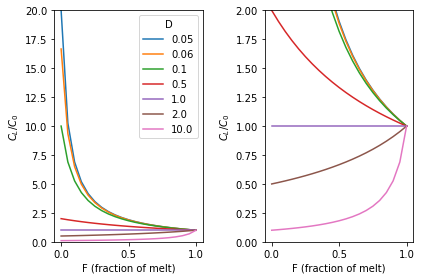

In [4]:
fig, axs = plt.subplots(1,2)

for ax in axs:
    for dist in D:
        C = batch_melt(F,dist)
        ax.plot(F,C,label=dist)
        ax.set_xlabel('F (fraction of melt)')
        ax.set_ylabel('$C_L/C_0$')

axs[0].set_ylim(0,20)
axs[1].set_ylim(0,2)
axs[0].legend(title='D')
plt.tight_layout()

### Fractional (Rayleigh) Crystallization Equation ###
$C_L/C_0 = F^{(D-1)}$

In [5]:
def frac_cryst(F,D):
    CL_C0 = F**(D-1)
    return(CL_C0)

We want to experiment with different starting conditions for our magma. These initial variables and their values are:
* D value ($C_i^{mineral}/C_i^{liquid}$) = 0.1
* starting concentration ($C_i^{0} liquid$) = 0.01
* starting liquid weight = 100
* amount crystallized each step	= 1


In [6]:
D = 0.1
C_0_liq = 0.01
initial_weight = 100
cryst_step = 1

Track F

In [7]:
step = cryst_step/initial_weight
F = np.round_(np.arange(1,0,-step),2)
print(F)

[1.   0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.9  0.89 0.88 0.87
 0.86 0.85 0.84 0.83 0.82 0.81 0.8  0.79 0.78 0.77 0.76 0.75 0.74 0.73
 0.72 0.71 0.7  0.69 0.68 0.67 0.66 0.65 0.64 0.63 0.62 0.61 0.6  0.59
 0.58 0.57 0.56 0.55 0.54 0.53 0.52 0.51 0.5  0.49 0.48 0.47 0.46 0.45
 0.44 0.43 0.42 0.41 0.4  0.39 0.38 0.37 0.36 0.35 0.34 0.33 0.32 0.31
 0.3  0.29 0.28 0.27 0.26 0.25 0.24 0.23 0.22 0.21 0.2  0.19 0.18 0.17
 0.16 0.15 0.14 0.13 0.12 0.11 0.1  0.09 0.08 0.07 0.06 0.05 0.04 0.03
 0.02 0.01]


Get $C_L/C_0$ and plot

In [8]:
CL_C0 = frac_cryst(F,D)
print(CL_C0)

[ 1.          1.00908633  1.01834874  1.02779249  1.03742304  1.04724611
  1.05726762  1.06749376  1.07793098  1.08858601  1.09946584  1.11057782
  1.12192957  1.1335291   1.14538474  1.15750524  1.16989973  1.18257779
  1.19554942  1.20882514  1.22241596  1.23633345  1.25058973  1.26519756
  1.28017036  1.29552221  1.31126797  1.32742327  1.34400459  1.36102934
  1.37851585  1.39648353  1.41495288  1.43394561  1.45348468  1.47359446
  1.49430078  1.51563109  1.53761455  1.56028218  1.58366703  1.60780431
  1.63273163  1.65848913  1.68511978  1.71266956  1.7411878   1.77072744
  1.80134538  1.83310289  1.86606598  1.90030595  1.93589985  1.97293114
  2.01149034  2.05167581  2.09359461  2.13736351  2.1831101   2.2309741
  2.28110884  2.33368295  2.38888236  2.44691255  2.50800125  2.57240154
  2.64039544  2.71229831  2.78846386  2.8692902   2.95522717  3.04678495
  3.14454469  3.24917133  3.36142934  3.48220225  3.61251686  3.7535737
  3.90678568  4.07382749  4.25669961  4.4578121   4.6

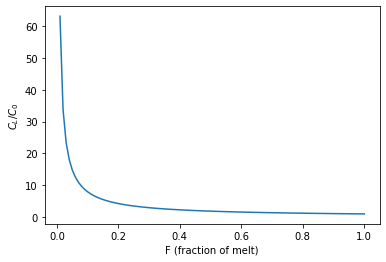

In [9]:
fig, ax = plt.subplots(1)

ax.plot(F,CL_C0)
ax.set_xlabel('F (fraction of melt)')
ax.set_ylabel('$C_L/C_0$')
plt.show()